In [1]:
import h5py as hdf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import glob 
import seaborn as sns
import os
import netCDF4 as cdf
from mpl_toolkits.basemap import Basemap
from scipy import stats
%pylab inline

Populating the interactive namespace from numpy and matplotlib


:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [4]:
asia   = pd.read_pickle('Asia_Joiner')
amazon = pd.read_pickle('Amazon_Joiner')
africa = pd.read_pickle('Africa_Joiner')

In [9]:
columns = ['Year','Month','Day','FsA','FsA_un','Qf_A','FsB','FsB_un','Qf_B','VZA G2A','VZA G2B','CF G2A','CF G2b']

for i in columns:
    print i
    asia[i].apply(pd.to_numeric)
    africa[i].apply(pd.to_numeric)
    amazon[i].apply(pd.to_numeric)

Year
Month
Day
FsA
FsA_un
Qf_A
FsB
FsB_un
Qf_B
VZA G2A
VZA G2B
CF G2A
CF G2b


In [40]:
amazon.head()

,Year,Month,Day,lat/lon G2A,lat/lon G2B,FsA,FsA_un,Qf_A,FsB,FsB_un,Qf_B,VZA G2A,VZA G2B,CF G2A,CF G2b
0,2013,3,2,"(-4.7002, -67.6844)","(-4.64395, -67.625)",2.01465,1.84463,1,2.2484,2.75113,2,53.7116,-35.8608,0.31138,0.184282
1,2013,4,1,"(-0.125336, -60.666)","(-0.058037, -60.6034)",0.743423,0.608977,2,0.676929,0.712616,2,50.7376,-40.0518,0.147131,0.0306908
2,2013,4,1,"(-0.47611, -60.7427)","(-0.408744, -60.6863)",0.366358,0.232417,2,1.01383,1.03999,2,50.7382,-40.0521,0.163978,0.0440812
3,2013,4,1,"(-0.972989, -60.1324)","(-0.905852, -60.0673)",1.11456,0.972546,2,2.24178,2.26286,2,47.5553,-43.9668,0.2331,0.0981032
4,2013,4,1,"(-0.825376, -60.8259)","(-0.761259, -60.761)",1.66243,1.53028,2,1.21715,1.23567,2,50.7673,-40.0658,0.165876,0.0885228


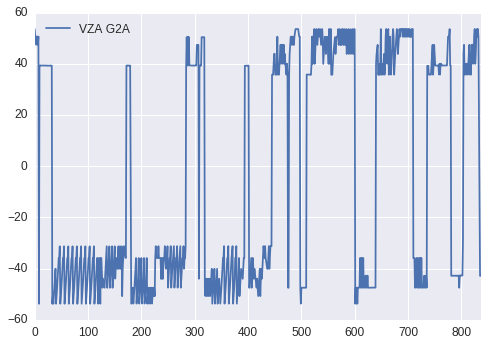

In [25]:
amazon['VZA G2A'].plot()
plt.legend(loc='best')

(426, 13)

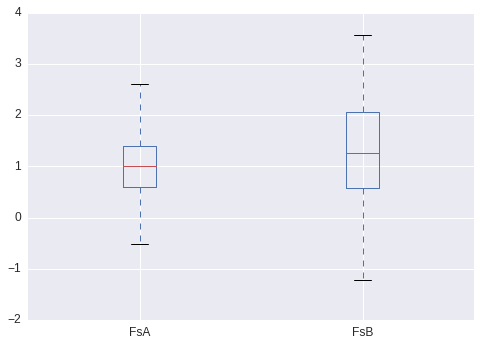

In [34]:
# Filtering for VZA
am_vza_p = amazon.loc[(amazon['VZA G2A']<0),
                      ['Year','Month','Day','FsA','FsA_un','Qf_A','FsB','FsB_un','Qf_B',
                       'VZA G2A','VZA G2B','CF G2A','CF G2b']]
am_vza_p[['FsA','FsB']].plot(kind='box')
am_vza_p.shape

/usr/lib/python2.7/site-packages/seaborn/categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


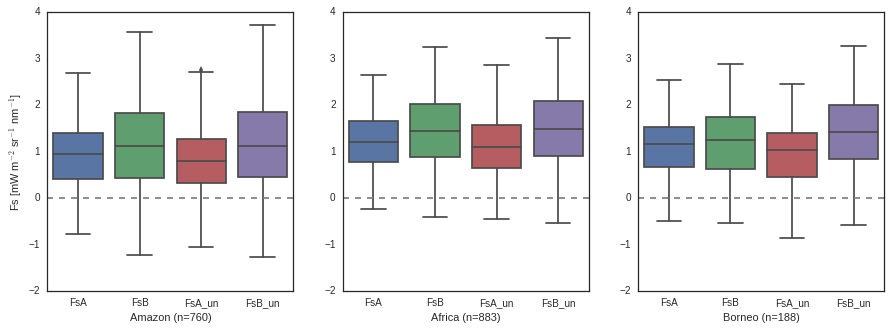

0.933637082577 1.104134202
1.1973284483 1.42911934853
1.149928689 1.24940907955


In [13]:
sns.set_style('white')
fig = plt.figure(1,figsize(15,5))

ax = fig.add_subplot(131)
ax = sns.boxplot((amazon[['FsA','FsB','FsA_un','FsB_un']]))
ax.set(ylabel='Fs [mW m$^{-2}$ sr$^{-1}$ nm$^{-1}$]')
ax.set(xlabel='Amazon (n=%i)'%amazon.shape[0])
plt.axhline(0,color='grey',linestyle='--')
plt.ylim(-2,4)

ax = fig.add_subplot(132)
ax = sns.boxplot((africa[['FsA','FsB','FsA_un','FsB_un']]))
ax.set(xlabel='Africa (n=%i)'%africa.shape[0])
plt.axhline(0,color='grey',linestyle='--')
plt.ylim(-2,4)

ax = fig.add_subplot(133)
ax = sns.boxplot((asia[['FsA','FsB','FsA_un','FsB_un']]))
ax.set(xlabel='Borneo (n=%i)'%asia.shape[0])
plt.axhline(0,color='grey',linestyle='--')
plt.ylim(-2,4)
sns.set(font_scale=1.2)

#fig.savefig('/usr/people/botiabo/04_Report_and_old_notebooks/Report/boxplot_tropics.png',bbox_inches='tight',DPI=1000)
plt.show()

print (amazon['FsA']).median(), (amazon['FsB']).median()
print (africa['FsA']).median(), (africa['FsB']).median()
print (asia['FsA']).median(), (asia['FsB']).median()

In [56]:
#amazon
amazonA = pd.Series(amazon['FsA'],name='Fs [mW m$^{-2}$ sr$^{-1}$ nm$^{-1}$]')
amazonB = pd.Series(amazon['FsB'],name='Amazon - Fs [mW m$^{-2}$ sr$^{-1}$ nm$^{-1}$]')
#africa
africaA = pd.Series(africa['FsA'],name='Fs [mW m$^{-2}$ sr$^{-1}$ nm$^{-1}$]')
africaB = pd.Series(africa['FsB'],name='Africa - Fs [mW m$^{-2}$ sr$^{-1}$ nm$^{-1}$]')

asiaA   = pd.Series(asia['FsA'],name='Fs [mW m$^{-2}$ sr$^{-1}$ nm$^{-1}$]')
asiaB   = pd.Series(asia['FsB'],name='Borneo - Fs [mW m$^{-2}$ sr$^{-1}$ nm$^{-1}$]')


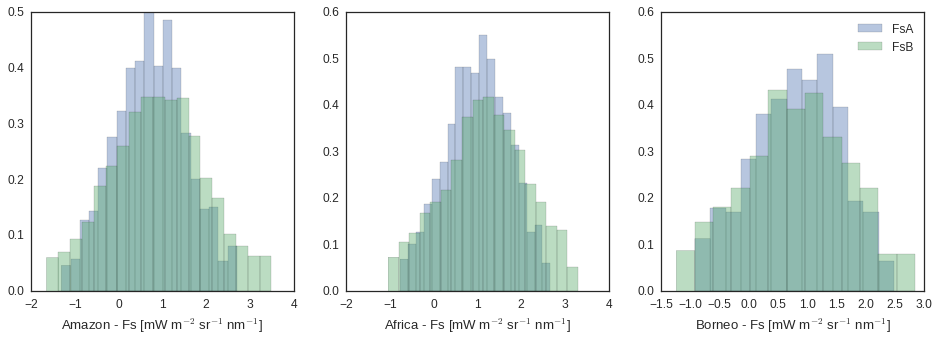

In [57]:
f  = plt.figure(1,figsize(16,5))
sns.set_style('white')
a  = f.add_subplot(131)
ax = sns.distplot(amazonA,kde=False,norm_hist=True)
ax = sns.distplot(amazonB,kde=False,norm_hist=True)
plt.ylim(0,0.5)

a  = f.add_subplot(132)
ax = sns.distplot(africaA,kde=False,norm_hist=True)
ax = sns.distplot(africaB,kde=False,norm_hist=True)

a  = f.add_subplot(133)
ax = sns.distplot(asiaA,kde=False,norm_hist=True,label='FsA')
ax = sns.distplot(asiaB,kde=False,norm_hist=True,label='FsB')
plt.legend()

plt.subplots_adjust(wspace=0.2)
#f.savefig('/usr/people/botiabo/04_Report_and_old_notebooks/Report/hist_tropics.png',bbox_inches='tight',DPI=1000)
plt.show()

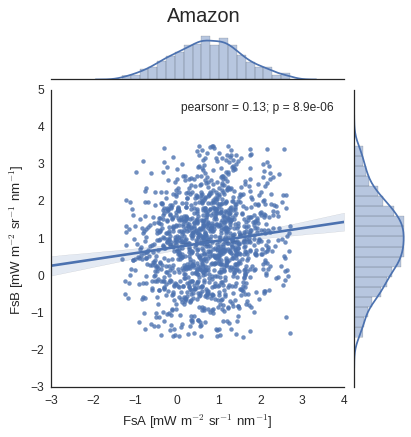

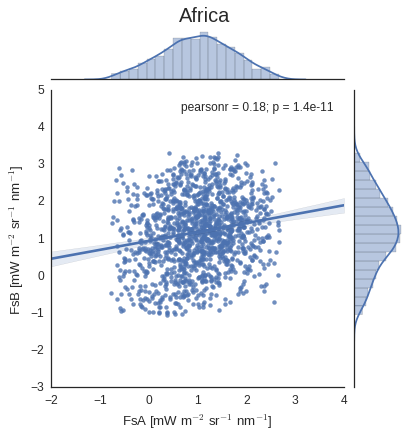

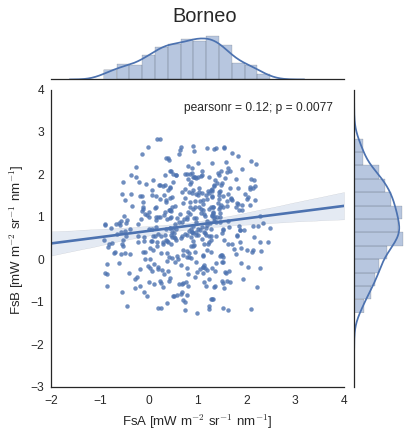

In [58]:
amazonA = pd.Series(amazon['FsA'],name='FsA [mW m$^{-2}$ sr$^{-1}$ nm$^{-1}$]')
amazonB = pd.Series(amazon['FsB'],name='FsB [mW m$^{-2}$ sr$^{-1}$ nm$^{-1}$]')
#africa
africaA = pd.Series(africa['FsA'],name='FsA [mW m$^{-2}$ sr$^{-1}$ nm$^{-1}$]')
africaB = pd.Series(africa['FsB'],name='FsB [mW m$^{-2}$ sr$^{-1}$ nm$^{-1}$]')

asiaA   = pd.Series(asia['FsA'],name='FsA [mW m$^{-2}$ sr$^{-1}$ nm$^{-1}$]')
asiaB   = pd.Series(asia['FsB'],name='FsB [mW m$^{-2}$ sr$^{-1}$ nm$^{-1}$]')

amazonA = amazonA.apply(pd.to_numeric, errors='ignore')
amazonB = amazonB.apply(pd.to_numeric, errors='ignore')

africaA = africaA.apply(pd.to_numeric, errors='ignore')
africaB = africaB.apply(pd.to_numeric, errors='ignore')

asiaA = asiaA.apply(pd.to_numeric, errors='ignore')
asiaB = asiaB.apply(pd.to_numeric, errors='ignore')


#fig = plt.figure(1,figsize(20,10))
sns.set_style('white')

ax  = fig.add_subplot(131)
ax  = sns.jointplot(amazonA,amazonB,kind='reg')
#ax  = sns.lmplot('FsA','FsB',amazon.apply(pd.to_numeric,errors='ignore'))
ax.fig.suptitle('Amazon', verticalalignment='baseline', fontsize=20)
#ax.savefig('/usr/people/botiabo/04_Report_and_old_notebooks/Report/joint_ama.png',bbox_inches='tight',DPI=1000)

ax  = fig.add_subplot(132)
ax  = sns.jointplot(africaA,africaB,kind='reg')
#ax  = sns.lmplot('FsA','FsB',africa.apply(pd.to_numeric,errors='ignore'))
ax.fig.suptitle('Africa', verticalalignment='baseline', fontsize=20)
#ax.savefig('/usr/people/botiabo/04_Report_and_old_notebooks/Report/joint_afr.png',bbox_inches='tight',DPI=1000)

ax  = fig.add_subplot(133)
ax  = sns.jointplot(asiaA,asiaB,kind='reg')
#ax  = sns.lmplot('FsA','FsB',asia.apply(pd.to_numeric,errors='ignore'))
ax.fig.suptitle('Borneo', verticalalignment='baseline', fontsize=20)
#ax.savefig('/usr/people/botiabo/04_Report_and_old_notebooks/Report/joint_born.png',bbox_inches='tight',DPI=1000)




In [110]:
amazon_vza_a = pd.Series(amazon['VZA G2A'].apply(abs),name='Amazon VZA A- [degrees]')
amazon_vza_b = pd.Series(amazon['VZA G2B'].apply(abs),name='Amazon VZA - [degrees]')

africa_vza_a = pd.Series(africa['VZA G2A'].apply(abs),name='Africa VZA A - [degrees]')
africa_vza_b = pd.Series(africa['VZA G2B'].apply(abs),name='Africa VZA  - [degrees]')

asia_vza_a   = pd.Series(asia['VZA G2A'].apply(abs),name='Borneo VZA A - [degrees]')
asia_vza_b   = pd.Series(asia['VZA G2B'].apply(abs),name='Borneo VZA  - [degrees]')


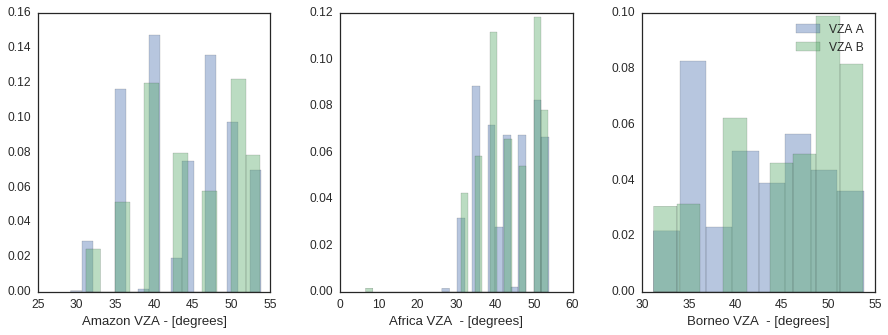

In [111]:
f = plt.figure(1,figsize(15,5))
sns.set_style('white')
a  = f.add_subplot(131)
ax = sns.distplot(amazon_vza_a,kde=False,norm_hist=True)
ax = sns.distplot(amazon_vza_b,kde=False,norm_hist=True,label='aa')
#plt.ylim(0,0.05)
#plt.xlim(15,60)

a  = f.add_subplot(132)
ax = sns.distplot(africa_vza_a,kde=False,norm_hist=True)
ax = sns.distplot(africa_vza_b,kde=False,norm_hist=True)
#plt.ylim(0,0.05)
#plt.xlim(15,60)

a  = f.add_subplot(133)
ax = sns.distplot(asia_vza_a,kde=False,bins=None,norm_hist=True,label='VZA A')
ax = sns.distplot(asia_vza_b,kde=False,bins=None,norm_hist=True,label='VZA B')
#plt.ylim(0,0.05)
#plt.xlim(15,60)
plt.legend()

plt.subplots_adjust(wspace=0.3)
#fig.savefig('/usr/people/botiabo/04_Report_and_old_notebooks/Report/vza_hist_tropics.png',bbox_inches='tight',DPI=1000)
plt.show()



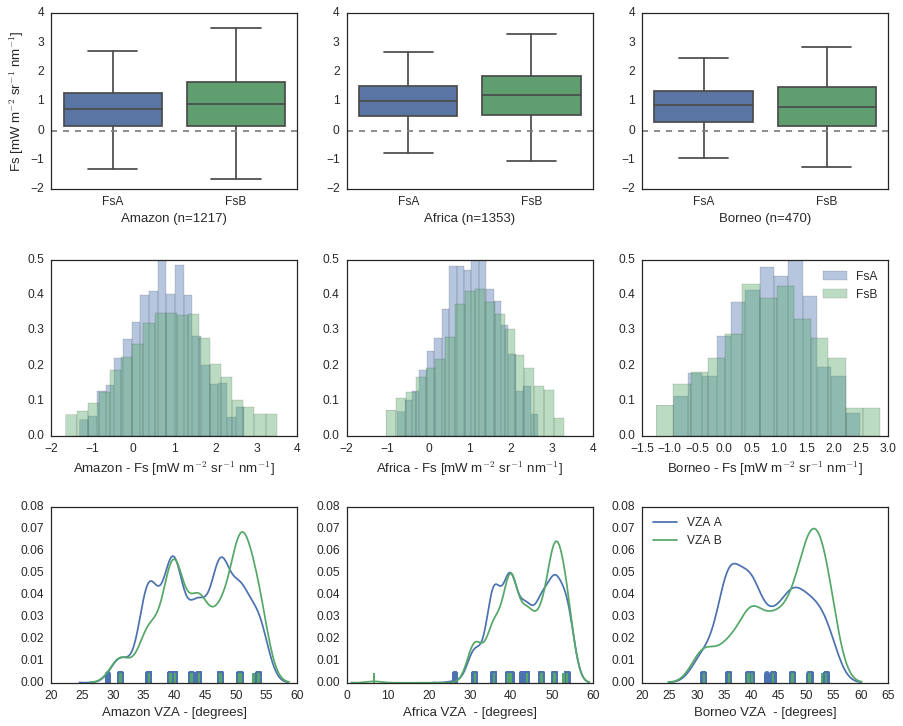

In [113]:
sns.set_style('white')
fig = plt.figure(1,figsize(15,12))

ax = fig.add_subplot(331)
ax = sns.boxplot((amazon[['FsA','FsB']]))
ax.set(ylabel='Fs [mW m$^{-2}$ sr$^{-1}$ nm$^{-1}$]')
ax.set(xlabel='Amazon (n=%i)'%amazon.shape[0])
plt.axhline(0,color='grey',linestyle='--')
plt.ylim(-2,4)

ax = fig.add_subplot(332)
ax = sns.boxplot((africa[['FsA','FsB']]))
ax.set(xlabel='Africa (n=%i)'%africa.shape[0])
plt.axhline(0,color='grey',linestyle='--')
plt.ylim(-2,4)

ax = fig.add_subplot(333)
ax = sns.boxplot((asia[['FsA','FsB']]))
ax.set(xlabel='Borneo (n=%i)'%asia.shape[0])
plt.axhline(0,color='grey',linestyle='--')
plt.ylim(-2,4)
#sns.set(font_scale=1.2)

amazonA = pd.Series(amazon['FsA'],name='Fs [mW m$^{-2}$ sr$^{-1}$ nm$^{-1}$]')
amazonB = pd.Series(amazon['FsB'],name='Amazon - Fs [mW m$^{-2}$ sr$^{-1}$ nm$^{-1}$]')
#africa
africaA = pd.Series(africa['FsA'],name='Fs [mW m$^{-2}$ sr$^{-1}$ nm$^{-1}$]')
africaB = pd.Series(africa['FsB'],name='Africa - Fs [mW m$^{-2}$ sr$^{-1}$ nm$^{-1}$]')

asiaA   = pd.Series(asia['FsA'],name='Fs [mW m$^{-2}$ sr$^{-1}$ nm$^{-1}$]')
asiaB   = pd.Series(asia['FsB'],name='Borneo - Fs [mW m$^{-2}$ sr$^{-1}$ nm$^{-1}$]')

ax = fig.add_subplot(334)
ax = sns.distplot(amazonA,kde=False,norm_hist=True)
ax = sns.distplot(amazonB,kde=False,norm_hist=True)
plt.ylim(0,0.5)
ax = fig.add_subplot(335)
ax = sns.distplot(africaA,kde=False,norm_hist=True)
ax = sns.distplot(africaB,kde=False,norm_hist=True)
plt.ylim(0,0.5)
ax  = fig.add_subplot(336)
ax = sns.distplot(asiaA,kde=False,norm_hist=True,label='FsA')
ax = sns.distplot(asiaB,kde=False,norm_hist=True,label='FsB')
plt.ylim(0,0.5)
plt.legend()

ax  = fig.add_subplot(337)
#ax = sns.distplot(amazon_vza_a,kde=False,norm_hist=True)
#ax = sns.distplot(amazon_vza_b,kde=False,norm_hist=True)
ax = sns.distplot(amazon_vza_a,rug=True,hist=False,rug_kws={"lw": 6,"linestyle":'-'})
ax = sns.distplot(amazon_vza_b,rug=True,hist=False,rug_kws={"lw": 2,"linestyle":'-'})
#ax  = sns.jointplot(amazon_vza_a,amazon['FsA'],rug=True,kind='kde')
plt.ylim(0,0.08)
#plt.xlim(15,60)

ax = fig.add_subplot(338)
#ax = sns.distplot(africa_vza_a,kde=False,norm_hist=True)
#ax = sns.distplot(africa_vza_b,kde=False,norm_hist=True)
ax = sns.distplot(africa_vza_a,rug=True,hist=False,rug_kws={"lw": 6,"linestyle":'-'})
ax = sns.distplot(africa_vza_b,rug=True,hist=False,rug_kws={"lw": 2,"linestyle":'-'})

plt.ylim(0,0.08)
#plt.xlim(15,60)

ax = fig.add_subplot(339)
#ax = sns.distplot(asia_vza_a,kde=False,bins=10,norm_hist=True,label='VZA A')
#ax = sns.distplot(asia_vza_b,kde=False,bins=10,norm_hist=True,label='VZA B')
ax = sns.distplot(asia_vza_a,rug=True,hist=False,rug_kws={"lw": 6,"linestyle":'-'},label='VZA A')
ax = sns.distplot(asia_vza_b,rug=True,hist=False,rug_kws={"lw": 2,"linestyle":'-'},label='VZA B')

#plt.ylim(0,0.05)
#plt.xlim(15,60)
plt.legend(loc='upper left')

#ax  = sns.jointplot(amazon_vza_a,amazon['FsA'],rug=True,kind='kde')

plt.subplots_adjust(wspace=0.2,hspace=0.4)
fig.savefig('/usr/people/botiabo/04_Report_and_old_notebooks/Report/all_stats_tropics_joiner.png',bbox_inches='tight',DPI=1000)
plt.show()



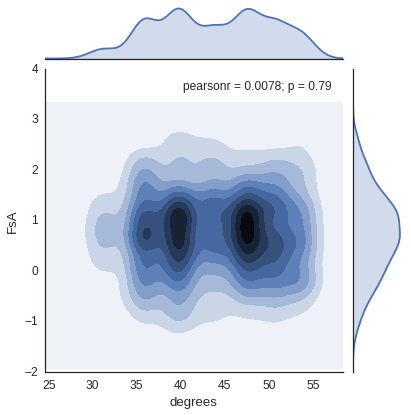

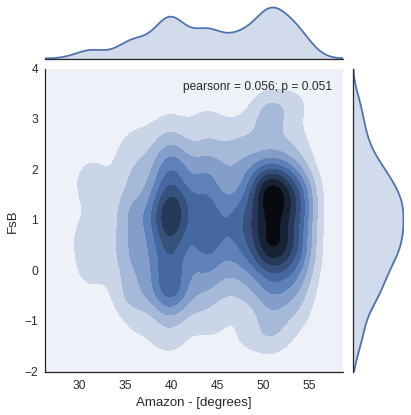

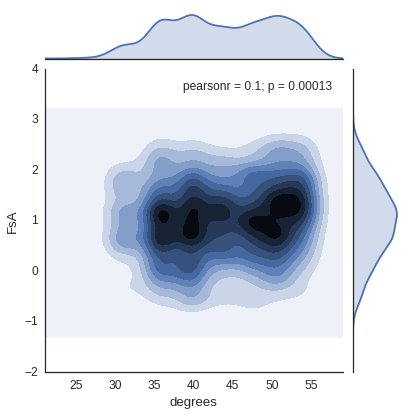

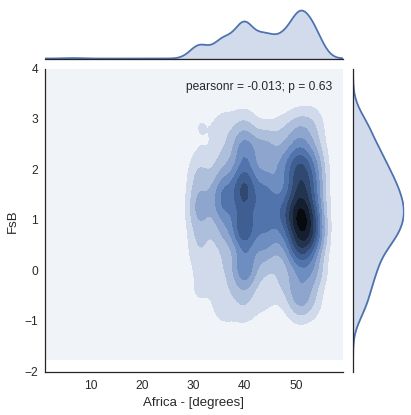

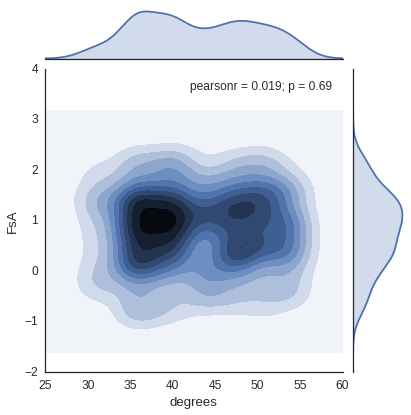

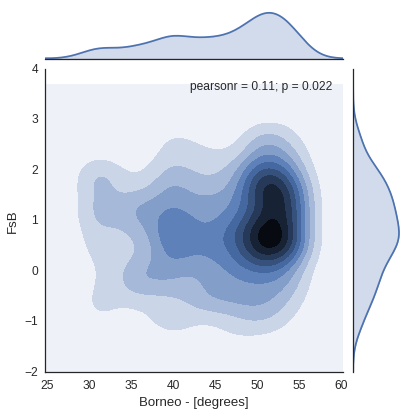

In [52]:

#fig = plt.figure(1,figsize(20,10))
sns.set_style('white')
ymin = -2
ymax = 4

ax  = fig.add_subplot(321)
ax  = sns.jointplot(amazon_vza_a,amazon['FsA'],rug=True,kind='kde')
#ax  = sns.lmplot('FsA','FsB',amazon.apply(pd.to_numeric,errors='ignore'))
plt.ylim(ymin,ymax)

ax  = fig.add_subplot(322)
ax  = sns.jointplot(amazon_vza_b,amazon['FsB'],rug=True,kind='kde')
plt.ylim(ymin,ymax)

ax  = fig.add_subplot(323)
ax  = sns.jointplot(africa_vza_a,africa['FsA'],rug=True,kind='kde')
#ax  = sns.lmplot('FsA','FsB',africa.apply(pd.to_numeric,errors='ignore'))
plt.ylim(ymin,ymax)

ax  = fig.add_subplot(324)
ax  = sns.jointplot(africa_vza_b,africa['FsB'],rug=True,kind='kde')
plt.ylim(ymin,ymax)

ax  = fig.add_subplot(325)
ax  = sns.jointplot(asia_vza_a,asia['FsA'],rug=True,kind='kde')
#ax  = sns.lmplot('FsA','FsB',africa.apply(pd.to_numeric,errors='ignore'))
plt.ylim(ymin,ymax)

ax  = fig.add_subplot(326)
ax  = sns.jointplot(asia_vza_b,asia['FsB'],rug=True,kind='kde')

plt.ylim(ymin,ymax)

#ax  = fig.add_subplot(133)
#ax  = sns.jointplot(asiaA,asia['FsA']*1000,kind='reg')
plt.show()

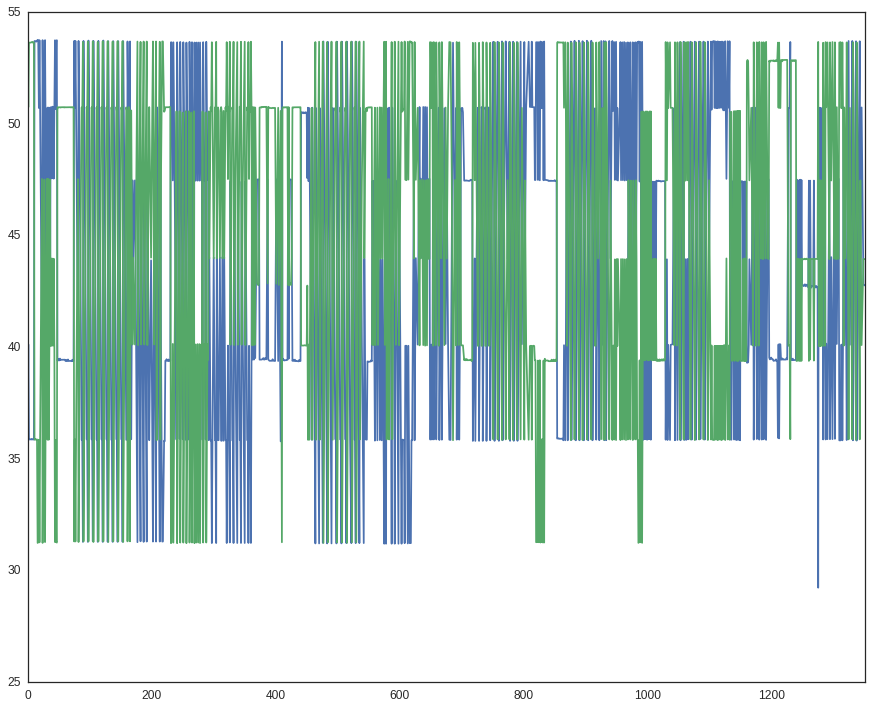

In [48]:
#plt.scatter((amazon['VZA G2A']-amazon['VZA G2B'],a)
amazon_vza_a.plot()
amazon_vza_b.plot()

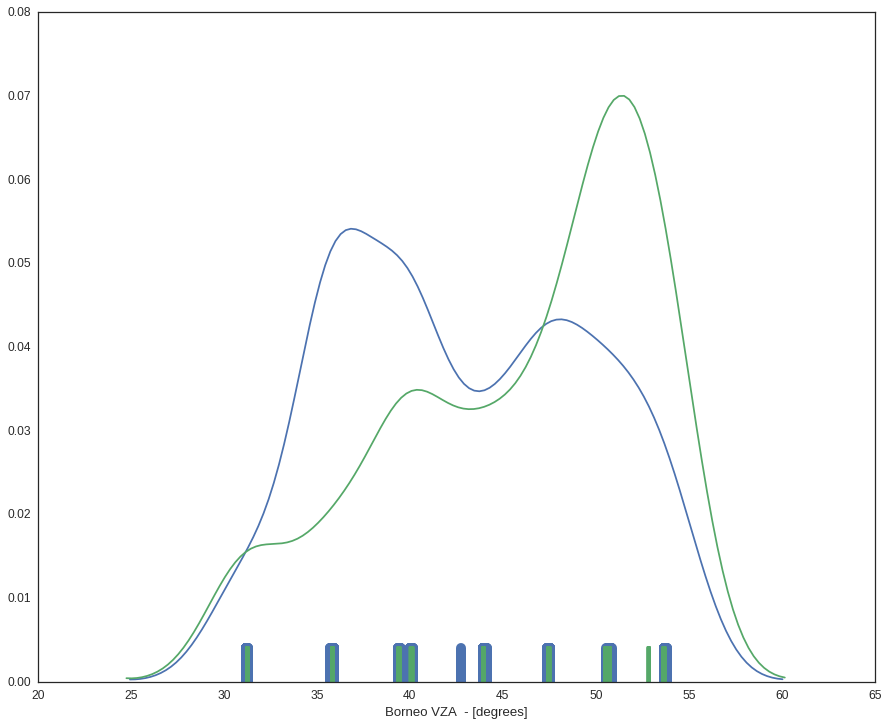

In [101]:
sns.distplot(asia_vza_a,rug=True,hist=False,rug_kws={"alpha":1,"lw": 10,"linestyle":'-'})
sns.distplot(asia_vza_b,rug=True,hist=False,rug_kws={"alpha":100,"lw": 4,"linestyle":'-'})

#rug_kws={"color": "g"}

In [67]:
sns.distplot?

In [26]:
from __future__ import division
import math
def to_degrees(x):
    a = math.acos(x)*(180/math.pi)
    return a

In [32]:
from __future__ import division
import math
def to_decimals(x):
    a = math.cos(x)#*(180/math.pi)
    return a

In [3]:
asia_joi   = pd.read_pickle('Asia_Joiner')
amazon_joi = pd.read_pickle('Amazon_Joiner')
africa_joi = pd.read_pickle('Africa_Joiner')

asia_sif   = pd.read_pickle('Asia_new')
amazon_sif = pd.read_pickle('Amazon_new')
africa_sif = pd.read_pickle('Africa_new')

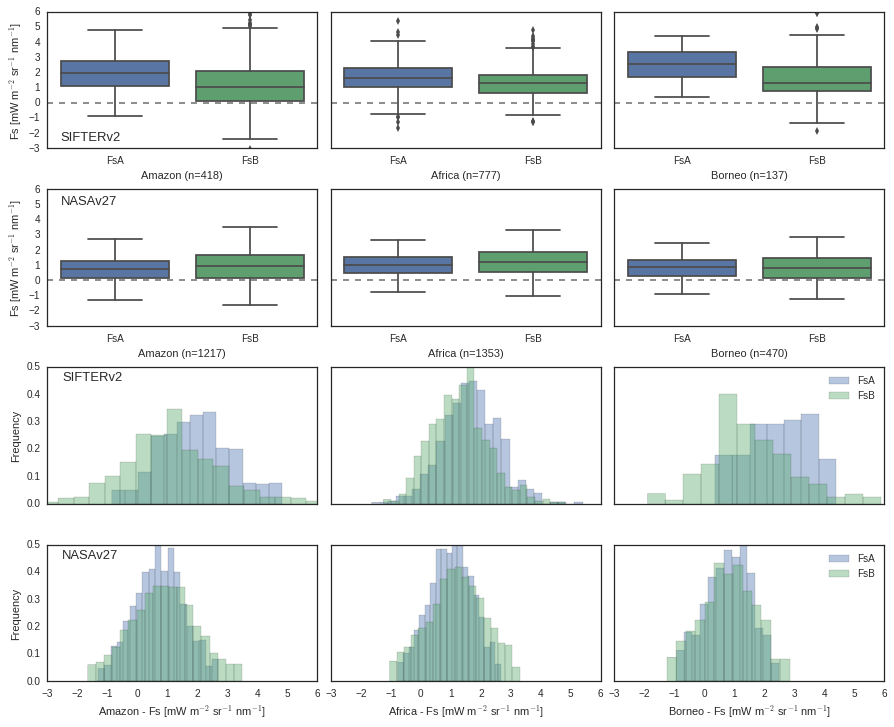

In [52]:
import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(4, 3)

sns.set_style('white')
fig = plt.figure(1,figsize(15,12))

ax = plt.subplot(gs[0, 0])
ax = sns.boxplot((amazon_sif[['FsA','FsB']]*1000))
ax.set(ylabel='Fs [mW m$^{-2}$ sr$^{-1}$ nm$^{-1}$]')
ax.set(xlabel='Amazon (n=%i)'%amazon_sif.shape[0])
plt.axhline(0,color='grey',linestyle='--')
plt.ylim(-3,6)
ax.annotate('SIFTERv2', xy=(-0.4, -2.5),fontsize=13)

ax = plt.subplot(gs[0, 1])
ax = sns.boxplot((africa_sif[['FsA','FsB']]*1000))
ax.set(xlabel='Africa (n=%i)'%africa_sif.shape[0])
plt.axhline(0,color='grey',linestyle='--')
plt.ylim(-3,6)
plt.setp(ax.get_yticklabels(), visible=False)

ax = plt.subplot(gs[0, 2])
ax = sns.boxplot((asia_sif[['FsA','FsB']]*1000))
ax.set(xlabel='Borneo (n=%i)'%asia_sif.shape[0])
plt.axhline(0,color='grey',linestyle='--')
plt.ylim(-3,6)
plt.setp(ax.get_yticklabels(), visible=False)

ax = plt.subplot(gs[1, 0])
ax = sns.boxplot((amazon_joi[['FsA','FsB']]))
ax.set(ylabel='Fs [mW m$^{-2}$ sr$^{-1}$ nm$^{-1}$]')
ax.set(xlabel='Amazon (n=%i)'%amazon_joi.shape[0])
plt.axhline(0,color='grey',linestyle='--')
plt.ylim(-3,6)
ax.annotate('NASAv27', xy=(-0.4, 5),fontsize=13)

ax = plt.subplot(gs[1, 1])
ax = sns.boxplot((africa_joi[['FsA','FsB']]))
ax.set(xlabel='Africa (n=%i)'%africa_joi.shape[0])
plt.axhline(0,color='grey',linestyle='--')
plt.ylim(-3,6)
plt.setp(ax.get_yticklabels(), visible=False)

ax = plt.subplot(gs[1, 2])
ax = sns.boxplot((asia_joi[['FsA','FsB']]))
ax.set(xlabel='Borneo (n=%i)'%asia_joi.shape[0])
plt.axhline(0,color='grey',linestyle='--')
plt.ylim(-3,6)
plt.setp(ax.get_yticklabels(), visible=False)

amazonAsif = pd.Series(amazon_sif['FsA']*1000,name='')#,name='Fs [mW m$^{-2}$ sr$^{-1}$ nm$^{-1}$]')
amazonBsif = pd.Series(amazon_sif['FsB']*1000,name='')#,name='Amazon - Fs [mW m$^{-2}$ sr$^{-1}$ nm$^{-1}$]')
amazonAjoi = pd.Series(amazon_joi['FsA'],name='Fs [mW m$^{-2}$ sr$^{-1}$ nm$^{-1}$]')
amazonBjoi = pd.Series(amazon_joi['FsB'],name='Amazon - Fs [mW m$^{-2}$ sr$^{-1}$ nm$^{-1}$]')
#africa
africaAsif = pd.Series(africa_sif['FsA']*1000,name='')#'Fs [mW m$^{-2}$ sr$^{-1}$ nm$^{-1}$]')
africaBsif = pd.Series(africa_sif['FsB']*1000,name='')#'Africa - Fs [mW m$^{-2}$ sr$^{-1}$ nm$^{-1}$]')
africaAjoi = pd.Series(africa_joi['FsA'],name='Fs [mW m$^{-2}$ sr$^{-1}$ nm$^{-1}$]')
africaBjoi = pd.Series(africa_joi['FsB'],name='Africa - Fs [mW m$^{-2}$ sr$^{-1}$ nm$^{-1}$]')

asiaAsif   = pd.Series(asia_sif['FsA']*1000,name='')#'Fs [mW m$^{-2}$ sr$^{-1}$ nm$^{-1}$]')
asiaBsif   = pd.Series(asia_sif['FsB']*1000,name='')#'Borneo - Fs [mW m$^{-2}$ sr$^{-1}$ nm$^{-1}$]')
asiaAjoi   = pd.Series(asia_joi['FsA'],name='Fs [mW m$^{-2}$ sr$^{-1}$ nm$^{-1}$]')
asiaBjoi   = pd.Series(asia_joi['FsB'],name='Borneo - Fs [mW m$^{-2}$ sr$^{-1}$ nm$^{-1}$]')

ax = plt.subplot(gs[2, 0])
ax = sns.distplot(amazonAsif,kde=False,norm_hist=True)
ax = sns.distplot(amazonBsif,kde=False,norm_hist=True)
plt.ylim(0,0.5)
plt.xlim(-3,6)
ax.annotate('SIFTERv2', xy=(-2.5, 0.45),fontsize=13)
plt.ylabel('Frequency')
plt.setp(ax.get_xticklabels(), visible=False)

ax = plt.subplot(gs[2, 1])
ax = sns.distplot(africaAsif,kde=False,norm_hist=True)
ax = sns.distplot(africaBsif,kde=False,norm_hist=True)
plt.ylim(0,0.5)
plt.xlim(-3,6)
plt.setp(ax.get_yticklabels(), visible=False)
plt.setp(ax.get_xticklabels(), visible=False)

ax = plt.subplot(gs[2, 2])
ax = sns.distplot(asiaAsif,kde=False,norm_hist=True,label='FsA')
ax = sns.distplot(asiaBsif,kde=False,norm_hist=True,label='FsB')
plt.ylim(0,0.5)
plt.xlim(-3,6)
plt.legend()
plt.setp(ax.get_yticklabels(), visible=False)
plt.setp(ax.get_xticklabels(), visible=False)

ax = plt.subplot(gs[3, 0])
ax = sns.distplot(amazonAjoi,kde=False,norm_hist=True)
ax = sns.distplot(amazonBjoi,kde=False,norm_hist=True)
plt.ylim(0,0.5)
plt.xlim(-3,6)
ax.annotate('NASAv27', xy=(-2.5, 0.45),fontsize=13)
plt.ylabel('Frequency')

ax = plt.subplot(gs[3, 1])
ax = sns.distplot(africaAjoi,kde=False,norm_hist=True)
ax = sns.distplot(africaBjoi,kde=False,norm_hist=True)
plt.ylim(0,0.5)
plt.xlim(-3,6)
plt.setp(ax.get_yticklabels(), visible=False)

ax = plt.subplot(gs[3, 2])
ax = sns.distplot(asiaAjoi,kde=False,norm_hist=True,label='FsA')
ax = sns.distplot(asiaBjoi,kde=False,norm_hist=True,label='FsB')
plt.ylim(0,0.5)
plt.xlim(-3,6)
plt.legend()
plt.setp(ax.get_yticklabels(), visible=False)
plt.subplots_adjust(wspace=0.05,hspace=0.3)

fig.savefig('/usr/people/botiabo/04_Report_and_old_notebooks/Report/all_stats_tropics_both.png',bbox_inches='tight',DPI=1000)
plt.show()

In [ ]:
t = np.arange(0.01, 5.0, 0.01)
s1 = np.sin(2*np.pi*t)
s2 = np.exp(-t)
s3 = np.sin(4*np.pi*t)

ax1 = plt.subplot(311)
plt.plot(t, s1)
plt.setp(ax1.get_xticklabels(), fontsize=6)

# share x only
ax2 = plt.subplot(312, sharex=ax1)
plt.plot(t, s2)
# make these tick labels invisible
plt.setp(ax2.get_xticklabels(), visible=False)

# share x and y
ax3 = plt.subplot(313, sharex=ax1, sharey=ax1)
plt.plot(t, s3)
plt.xlim(0.01, 5.0)
plt.show()